<a href="https://colab.research.google.com/github/Piyush18-gadhvi/CNN_Tutorial/blob/main/VGGFeatureMapVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install keras
!pip install opencv-contrib-python
!pip install pillow

In [2]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from keras.models import load_model
import json

In [12]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [13]:
input_layer_shape = (224, 224, 3)
drive_weights_path = "/content/drive/MyDrive/weights.h5"
imagenet_labels_file_path = "/content/imagenet_class_index.json"
image_name = "/content/beer.png"
num_classes = 1000

In [14]:
trained_model = load_model(drive_weights_path)

In [15]:
trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
input_layer = Input(shape=input_layer_shape)

# Block 1
block1_conv1 = Conv2D(64, (3,3), activation="relu", padding="same", name="block1_conv1")(input_layer)
block1_conv2 = Conv2D(64, (3,3), activation="relu", padding="same", name="block1_conv2")(block1_conv1)
block1_pool = MaxPooling2D((2,2), strides=(2,2), name="block1_pool")(block1_conv2)

# Block 2
block2_conv1 = Conv2D(128, (3,3), activation="relu", padding="same", name="block2_conv1")(block1_pool)
block2_conv2 = Conv2D(128, (3,3), activation="relu", padding="same", name="block2_conv2")(block2_conv1)
block2_pool = MaxPooling2D((2,2), strides=(2,2), name="block2_pool")(block2_conv2)

# Block 3
block3_conv1 = Conv2D(256, (3,3), activation="relu", padding="same", name="block3_conv1")(block2_pool)
block3_conv2 = Conv2D(256, (3,3), activation="relu", padding="same", name="block3_conv2")(block3_conv1)
block3_conv3 = Conv2D(256, (3,3), activation="relu", padding="same", name="block3_conv3")(block3_conv2)
block3_pool = MaxPooling2D((2,2), strides=(2,2), name="block3_pool")(block3_conv3)

# Block 4
block4_conv1 = Conv2D(512, (3,3), activation="relu", padding="same", name="block4_conv1")(block3_pool)
block4_conv2 = Conv2D(512, (3,3), activation="relu", padding="same", name="block4_conv2")(block4_conv1)
block4_conv3 = Conv2D(512, (3,3), activation="relu", padding="same", name="block4_conv3")(block4_conv2)
block4_pool = MaxPooling2D((2,2), strides=(2,2), name="block4_pool")(block4_conv3)

# Block 5
block5_conv1 = Conv2D(512, (3,3), activation="relu", padding="same", name="block5_conv1")(block4_pool)
block5_conv2 = Conv2D(512, (3,3), activation="relu", padding="same", name="block5_conv2")(block5_conv1)
block5_conv3 = Conv2D(512, (3,3), activation="relu", padding="same", name="block5_conv3")(block5_conv2)
block5_pool = MaxPooling2D((2,2), strides=(2,2), name="block5_pool")(block5_conv3)

#flatten features
flattened_features = Flatten(name="flatten")(block5_pool)

#fc1
fc1 = Dense(4096, activation="relu", name="fc1")(flattened_features)

#fc2
fc2 = Dense(4096, activation="relu", name="fc2")(fc1)

#prdictions layer
predictions = Dense(num_classes, activation="softmax", name="predictions")(fc2)

In [17]:
model = Model(input_layer, predictions)

In [18]:
model.set_weights(trained_model.get_weights())

In [19]:
target_size = (224, 224)

In [20]:
sample_image = cv2.resize(cv2.imread(image_name), target_size)
print("Image Shape : ", sample_image.shape)
print("Min Value in Image array : ", sample_image.min())
print("Max Value in Image array : ", sample_image.max())

Image Shape :  (224, 224, 3)
Min Value in Image array :  0
Max Value in Image array :  255


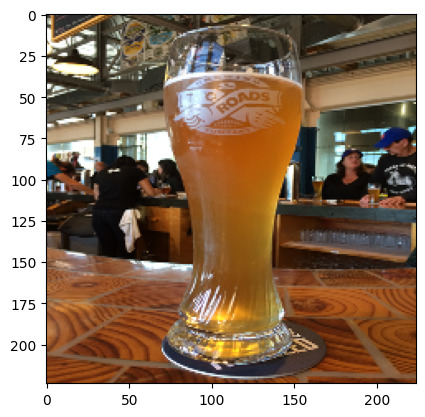

In [21]:
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

In [22]:
with open(imagenet_labels_file_path, "r") as handle:
  labels_dict = json.load(handle)

In [23]:
probs = model.predict(np.expand_dims(sample_image,axis=0))

1/1 [==============================] - 1s 885ms/step


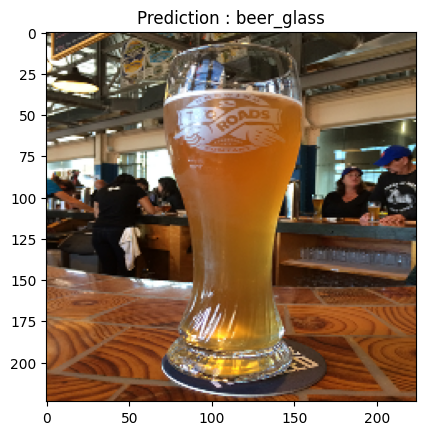

In [24]:
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.title("Prediction : %s"%(labels_dict[str(probs.argmax(axis=1)[0])][1]))
plt.show()

In [48]:
end_layer = block1_conv1

In [49]:
sub_model = Model(input_layer, end_layer)
print(sub_model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [50]:
layer_out = np.squeeze(sub_model.predict(np.expand_dims(sample_image, axis=0)), axis=0)
num_features_maps = layer_out.shape[2]
width_feature_maps = layer_out.shape[1]
height_feature_maps = layer_out.shape[0]

print("Num feature maps : ", num_features_maps)
print("Width of feature maps : ", width_feature_maps)
print("Height of feature maps : ", height_feature_maps)

1/1 [==============================] - 0s 58ms/step
Num feature maps :  64
Width of feature maps :  224
Height of feature maps :  224


In [51]:
num_rows = 8
num_cols = 8

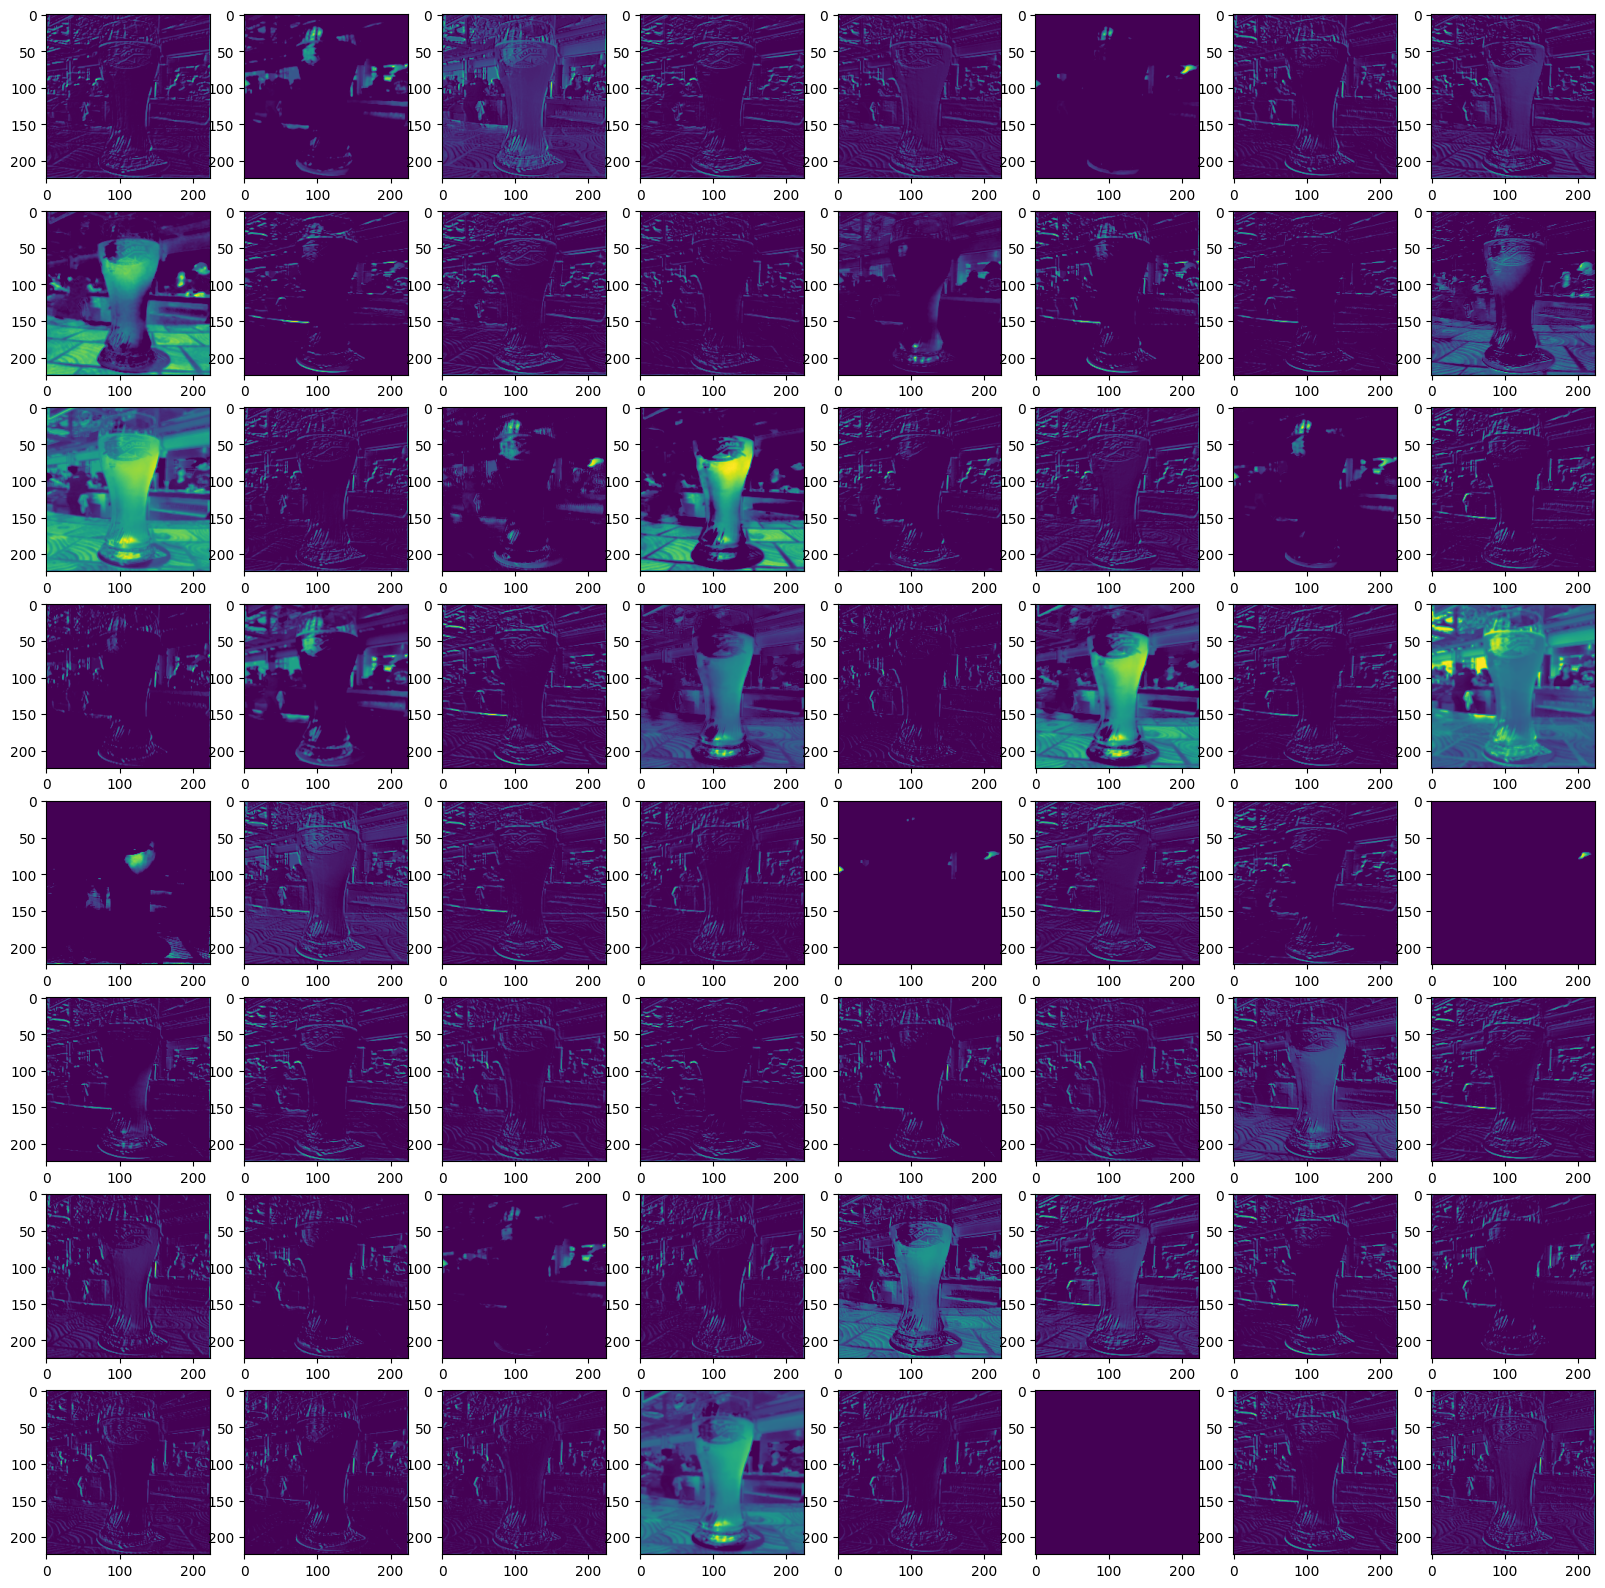

In [52]:
fig, ax = plt.subplots(nrows=num_rows,ncols=num_cols)
fig.set_figwidth(20)
fig.set_figheight(20)

index = 0
for row in ax:
  for col in row:
    col.grid(False)
    col.imshow(layer_out[:, : , index])
    index +=1

In [53]:
findex = 15

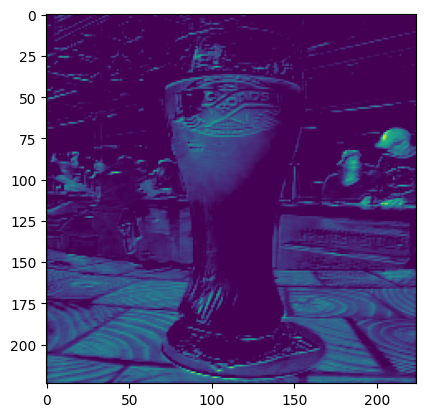

In [55]:
plt.grid(False)
plt.imshow(layer_out[:, : ,findex])
plt.show()